# 1. Dev: read

### 1.1 stlearn.read.table

In [59]:
import stlearn as st

In [60]:
data = st.read.file_table(filename="./stlearn/datasets/Brain1_ctrl_hp_tissue.tsv",delimiter="\t")

### 1.2 stlearn.read.10x_mtx

In [1]:
import stlearn as st

In [2]:
data = st.read.file_10x_mtx("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\filtered_feature_bc_matrix")

# 2. Dev: add

### 2.1. stlearn.add.image

In [3]:
st.add.image(adata=data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_lowres_image.png")

Trying to set attribute `.uns` of view, making a copy.


Added tissue image to the object!


### 2.2. stlearn.add.coordinates

In [4]:
st.add.positions(data,position_filepath = "C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_positions_list.csv",
                        scale_filepath = "C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\scalefactors_json.json")

In [5]:
data

AnnData object with n_obs × n_vars = 3813 × 33538 
    obs: 'imagerow', 'imagecol'
    var: 'gene_ids', 'feature_types'
    uns: 'tissue_img'

# Dev: preprocessing

### 3.1. stlearn.pp.filter_genes

In [6]:
st.pp.filter_genes(data,min_cells=0.01*data.X.shape[1])

filtered out 21848 genes that are detected in less than 335.38 cells


C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn\lib\site-packages\anndata\core\alignedmapping.py:162: UserWarning: AnnData does not currently support writing or reading of 'DataFrame' objects in obsm for either hdf5 or zarr formats.
  self._validate_value(value, key)


In [7]:
data

AnnData object with n_obs × n_vars = 3813 × 11690 
    obs: 'imagerow', 'imagecol', 'sum_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'tissue_img'
    obsm: 'filtered_counts'

### 3.2. stlearn.pp.normalize_total

In [12]:
import pandas as pd
st.pp.normalize_total(data)
data.obsm['normalised'] = test=pd.DataFrame(data.X.toarray(), index=data.obsm['filtered_counts'].index, columns=data.obsm['filtered_counts'].columns)

    finished normalized adata.X


C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn\lib\site-packages\anndata\core\alignedmapping.py:162: UserWarning: AnnData does not currently support writing or reading of 'DataFrame' objects in obsm for either hdf5 or zarr formats.
  self._validate_value(value, key)


In [13]:
data

AnnData object with n_obs × n_vars = 3813 × 11690 
    obs: 'imagerow', 'imagecol', 'sum_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'tissue_img'
    obsm: 'filtered_counts', 'normalised'

## B. Spatial Differential Expression

### 5.2 Basic analysis (stlearn.tl.SpatialDE.base)

In [8]:
data.obsm['filtered_counts']

AL645608.1  SAMD11  NOC2L  KLHL17  HES4  ISG15  AGRN  \
0                                                                          
AAACAAGTATCTCCCA-1         0.0     0.0    1.0     0.0   3.0   20.0   0.0   
AAACACCAATAACTGC-1         1.0     2.0    1.0     0.0   2.0   44.0   8.0   
AAACAGAGCGACTCCT-1         0.0     0.0    0.0     0.0   0.0    5.0   0.0   
AAACAGGGTCTATATT-1         0.0     0.0    0.0     0.0   2.0   19.0   0.0   
AAACAGTGTTCCTGGG-1         0.0     2.0    6.0     0.0   7.0   27.0   7.0   
...                        ...     ...    ...     ...   ...    ...   ...   
TTGTTGTGTGTCAAGA-1         0.0     0.0    1.0     0.0   2.0   12.0   1.0   
TTGTTTCACATCCAGG-1         0.0     3.0    0.0     0.0   0.0   26.0   2.0   
TTGTTTCATTAGTCTA-1         0.0     3.0    1.0     0.0   7.0   23.0   2.0   
TTGTTTCCATACAACT-1         0.0     0.0    0.0     0.0   4.0   16.0   1.0   
TTGTTTGTGTAAATTC-1         0.0     0.0    0.0     0.0   1.0   21.0   0.0   

                    C1orf159  AL390719.2  TNFRSF18  ...  MT-ATP8  MT-ATP6  \
0                                                   ...                     
AAACAAGTATCTCCCA-1       1.0         0.0       1.0  ...      0.0     45.0   
AAACACCAATAACTGC-1       1.0         1.0       3.0  ...      1.0    212.0   
AAACAGAGCGACTCCT-1       0.0         0.0       0.0  ...      0.0      7.0   
AAACAGGGTCTATATT-1       1.0         0.0       0.0  ...      0.0     56.0   
AAACAGTGTTCCTGGG-1       2.0         0.0       0.0  ...      3.0    196.0   
...                      ...         ...       ...  ...      ...      ...   
TTGTTGTGTGTCAAGA-1       1.0         0.0       1.0  ...      0.0     72.0   
TTGTTTCACATCCAGG-1       0.0         0.0       0.0  ...      0.0     98.0   
TTGTTTCATTAGTCTA-1       1.0         0.0       1.0  ...      3.0    100.0   
TTGTTTCCATACAACT-1       1.0         0.0       0.0  ...      1.0     55.0   
TTGTTTGTGTAAATTC-1       0.0         0.0       0.0  ...      3.0    160.0   

                    MT-CO3  MT-ND3  MT-ND4L  MT-ND4  MT-ND5  MT-CYB  \
0                                                                     
AAACAAGTATCTCCCA-1    75.0    40.0      1.0    49.0     7.0    33.0   
AAACACCAATAACTGC-1   396.0   134.0      3.0   166.0     9.0   170.0   
AAACAGAGCGACTCCT-1    10.0     9.0      0.0     9.0     0.0     5.0   
AAACAGGGTCTATATT-1    71.0    42.0      2.0    43.0     7.0    34.0   
AAACAGTGTTCCTGGG-1   293.0   125.0      6.0   191.0     8.0   141.0   
...                    ...     ...      ...     ...     ...     ...   
TTGTTGTGTGTCAAGA-1   146.0    66.0      1.0    63.0     1.0    46.0   
TTGTTTCACATCCAGG-1   123.0    80.0      2.0    83.0     3.0    69.0   
TTGTTTCATTAGTCTA-1   153.0    58.0      4.0    76.0     3.0    68.0   
TTGTTTCCATACAACT-1    96.0    53.0      1.0    76.0     3.0    40.0   
TTGTTTGTGTAAATTC-1   210.0   123.0      5.0   141.0    10.0    94.0   

                    AC011043.1  AC007325.4  
0                                           
AAACAAGTATCTCCCA-1         0.0         0.0  
AAACACCAATAACTGC-1         0.0         0.0  
AAACAGAGCGACTCCT-1         0.0         0.0  
AAACAGGGTCTATATT-1         0.0         0.0  
AAACAGTGTTCCTGGG-1         0.0         0.0  
...                        ...         ...  
TTGTTGTGTGTCAAGA-1         1.0         1.0  
TTGTTTCACATCCAGG-1         0.0         0.0  
TTGTTTCATTAGTCTA-1         0.0         0.0  
TTGTTTCCATACAACT-1         0.0         0.0  
TTGTTTGTGTAAATTC-1         0.0         0.0  

[3813 rows x 11690 columns]

Populating the interactive namespace from numpy and matplotlib


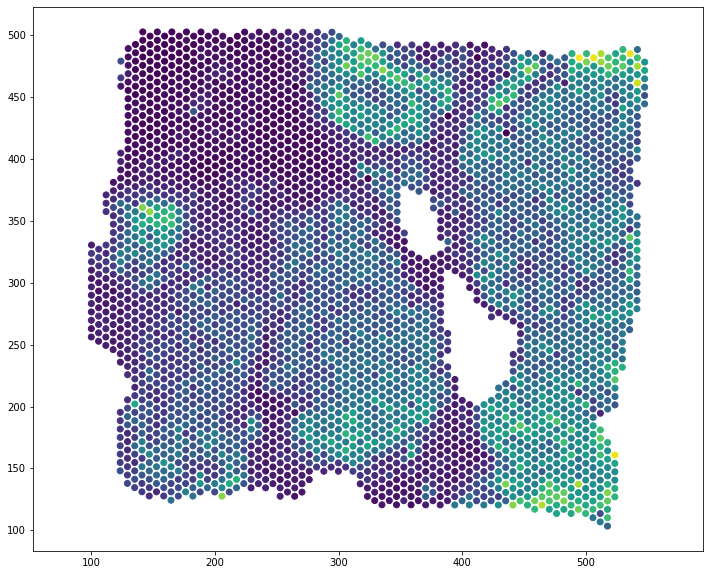

In [9]:
%pylab inline
figsize(12,10)
plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=data.obs['sum_counts']);
plt.axis('equal');

In [10]:
results, norm_expr = st.tl.SpatialDE.base.run(data)

KeyboardInterrupt: 

In [54]:
results.head().T

NameError: name 'results' is not defined

#### list top spatially differential expressing genes

In [17]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

g          l  pval  qval
1769     Efhd1  22.656316   0.0   0.0
1805  Tmem229a  22.656316   0.0   0.0
1806     Ptprt  22.656316   0.0   0.0
1807     Josd2  22.656316   0.0   0.0
1808     Desi1  22.656316   0.0   0.0

#### select top 3 and plot their expressions across the spatial spots

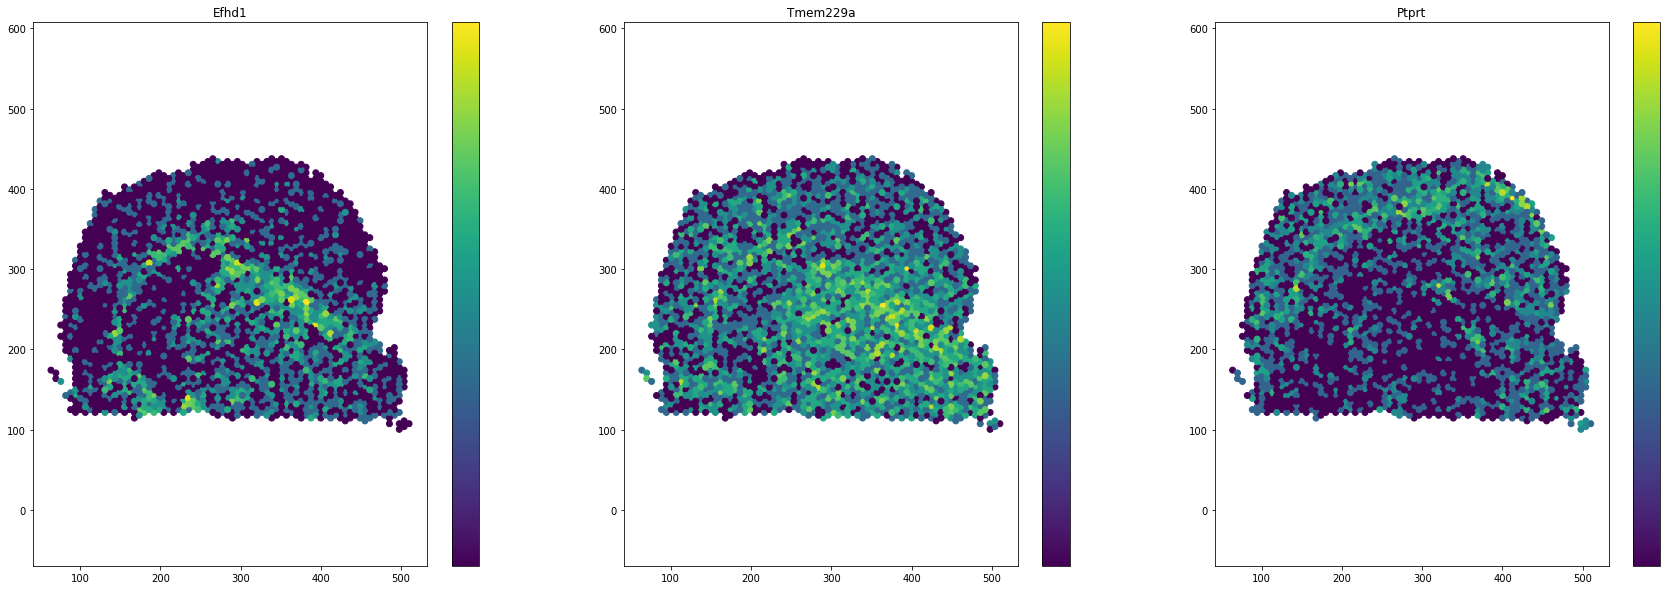

In [18]:
figsize(30, 10)
for i, g in enumerate(['Efhd1', 'Tmem229a', 'Ptprt']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')

    plt.colorbar(ticks=[]);

#### list bottom spatially differential expressing genes

In [19]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

g          l      qval
3752    Mdm4  42.241302  0.084274
231   Agpat1   3.495790  0.084274
1421   Copb2  22.656316  0.084274
574   Mfap1a   3.495790  0.084274
1398   Mrps7  22.656316  0.084274
37    Gpr180   3.495790  0.084274
1085   Atg2a  22.656316  0.084274
1066   Lin52  22.656316  0.084274
59     Psmc4   3.495790  0.084274
565   Clasrp   3.495790  0.084274

#### select bottom 3 and plot their expressions across the spatial spots

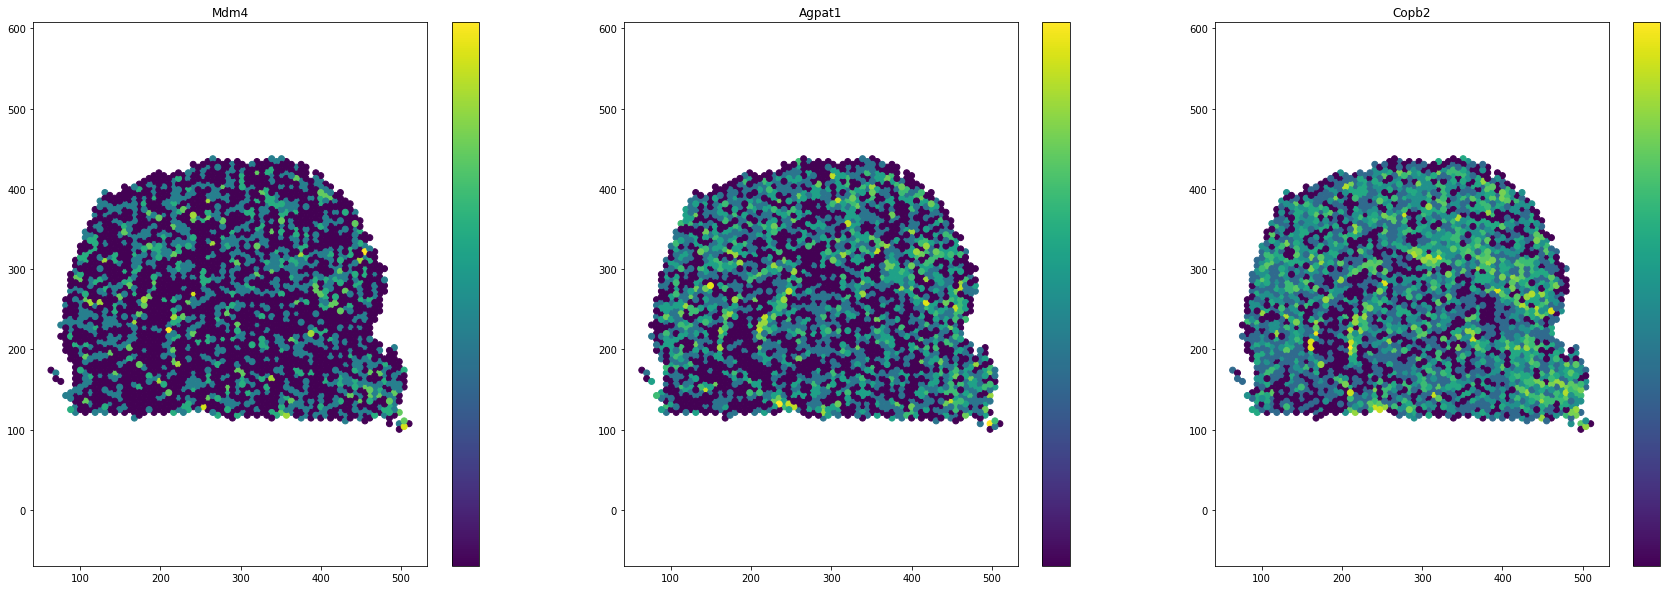

In [20]:
figsize(30, 10)
for i, g in enumerate(['Mdm4', 'Agpat1', 'Copb2']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')

    plt.colorbar(ticks=[]);

#### distribution of adjusted P-values and FSV

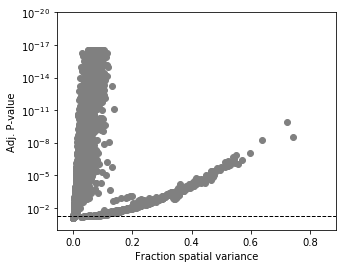

In [21]:
figsize(5, 4)
plt.yscale('log')
ylim(1e-20,1)
plt.scatter(results['FSV'], results['qval'], c='grey')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');

### 5.3 Automatic expression histology (stlearn.tl.SpatialDE.aeh)

#### assuming 5 different patterns and iterate till ELBO converges

In [22]:
histology_results, patterns = st.tl.SpatialDE.aeh.spatial_patterns(data, results, C=5, verbosity=1)

iter 0, ELBO: -1.26e+12
iter 1, ELBO: -6.38e+11, delta_ELBO: 6.25e+11
iter 2, ELBO: -6.38e+11, delta_ELBO: 2.70e+06
iter 3, ELBO: -6.38e+11, delta_ELBO: 2.14e+05
iter 4, ELBO: -6.38e+11, delta_ELBO: 2.07e+04
iter 5, ELBO: -6.38e+11, delta_ELBO: 8.00e+03
iter 6, ELBO: -6.38e+11, delta_ELBO: 5.71e+03
iter 7, ELBO: -6.38e+11, delta_ELBO: 2.82e+03
iter 8, ELBO: -6.38e+11, delta_ELBO: 9.00e+02
iter 9, ELBO: -6.38e+11, delta_ELBO: 1.72e+02
iter 10, ELBO: -6.38e+11, delta_ELBO: 1.34e+02
iter 11, ELBO: -6.38e+11, delta_ELBO: 4.85e+02
iter 12, ELBO: -6.38e+11, delta_ELBO: 3.07e+02
iter 13, ELBO: -6.38e+11, delta_ELBO: 2.78e+01
iter 14, ELBO: -6.38e+11, delta_ELBO: 1.92e+02
iter 15, ELBO: -6.38e+11, delta_ELBO: 1.42e+02
iter 16, ELBO: -6.38e+11, delta_ELBO: 4.38e+02
iter 17, ELBO: -6.38e+11, delta_ELBO: 3.54e+02
iter 18, ELBO: -6.38e+11, delta_ELBO: 1.69e+00
iter 19, ELBO: -6.38e+11, delta_ELBO: 2.60e+02
iter 20, ELBO: -6.38e+11, delta_ELBO: 4.43e+02
iter 21, ELBO: -6.38e+11, delta_ELBO: 1.41e+0

In [23]:
histology_results.head()

g  pattern  membership
0    Rbm7        4         1.0
1   Cldn5        4         1.0
2  Ruvbl1        4         1.0
3  U2surp        4         1.0
4   Kdm5a        4         1.0

#### plot the 5 spatial expression patterns with genes in each pattern

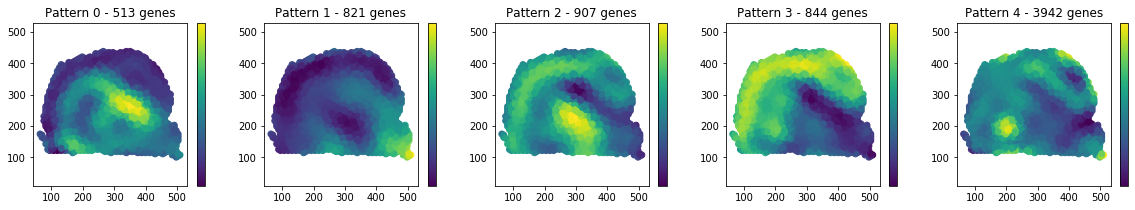

In [24]:
figsize(20, 3)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=patterns[i]);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[]);

In [25]:
for i in histology_results.sort_values('pattern').pattern.unique():
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
Eif2s2, Rab33b, Dazap2, Ipo13, Dnmt3a, Etnppl, Rhoq, Diablo, Rida, Mat2a, Gabarapl2, Nab1, Gclm, Selenom, Macrod1, Pdia4, Sema5a, Ndufb10, Itch, Ctsa, Nras, Cenpb, Bcap31, Hmgb1, Coro1c, Cstb, Ddrgk1, Hibadh, Pdgfa, Itgb8, Rab4a, Sptlc2, Sys1, Enho, Bcat1, Fabp5, Pex5l, Ifi27, P3h4, Hmgcl, Fermt2, Zbtb20, Mpv17l2, Fkbp4, Tspan3, Rab21, Leprot, Capns1, Inpp5f, Rela, Txndc16, Specc1, Fez2, Hmgn2, Fam102a, Nop53, Adh5, Sulf2, Idi1, Slc25a38, Map7, 1810037I17Rik, Ccdc34, Pcx, Pex2, Hadh, Sptssa, Snx1, Plat, 1810058I24Rik, Cyp51, Apbb2, Eprs, Slc2a1, Dhcr7, Polr3e, Ctsz, Ptges3, Anapc13, Alg14, Edem2, Pura, Vezf1, Rnpepl1, Urm1, Ptpdc1, Adipor1, Tspan9, Zdhhc20, Gpr108, Rpl5, Pigyl, Stk39, Tmem41b, Anapc11, Sc5d, Cfl2, Cox4i1, Nek7, Rsu1, Larp6, Sash1, Nfic, Mid1ip1, Pcdh9, Pnpla2, Paics, Anxa5, Slc9a3r2, Stx4a, Ctnnbip1, Rac1, Abl1, Mmp15, Cntfr, Paip2, Daam1, Chmp5, Grhpr, Fasn, Sdhc, Msrb1, Gatad2a, Nudt4, Aig1, Aqp4, Dusp26, Acaa1a, S100a13, Snx30, Hsd17b12, Hadhb, Ube2d1, Dst

## C. Cell-cell interactions

### 5.4 Microenvironment analysis

In [14]:
import pandas as pd
lr = pd.read_csv("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\cpdb\\means.txt", sep='\t')['interacting_pair'].to_list()
lr2 = [i for i in lr if 'complex' not in i]
lr3 = [i for i in lr2 if ' ' not in i]
lr4 = [i for i in lr3 if i.count('_') == 1]

In [15]:
data = st.tl.cci.base.lr_cluster(data, 'normalised', lr4, 3)

Altogether (3813, 206) ligand receptor pairs.
The largest expressed cluster is:  0


C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
No handles with labels found to put in legend.


Populating the interactive namespace from numpy and matplotlib


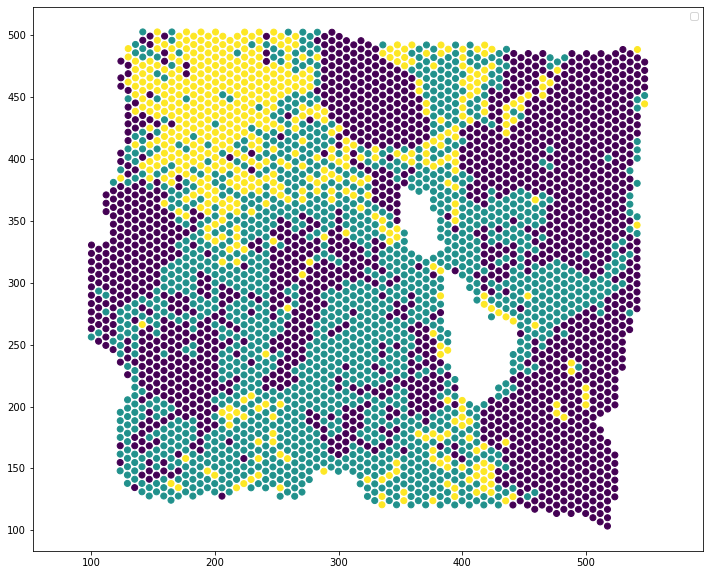

In [16]:
%pylab inline
figsize(12,10)
plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=data.obs['lr_cluster']);
plt.legend();
plt.axis('equal');

No handles with labels found to put in legend.


Populating the interactive namespace from numpy and matplotlib


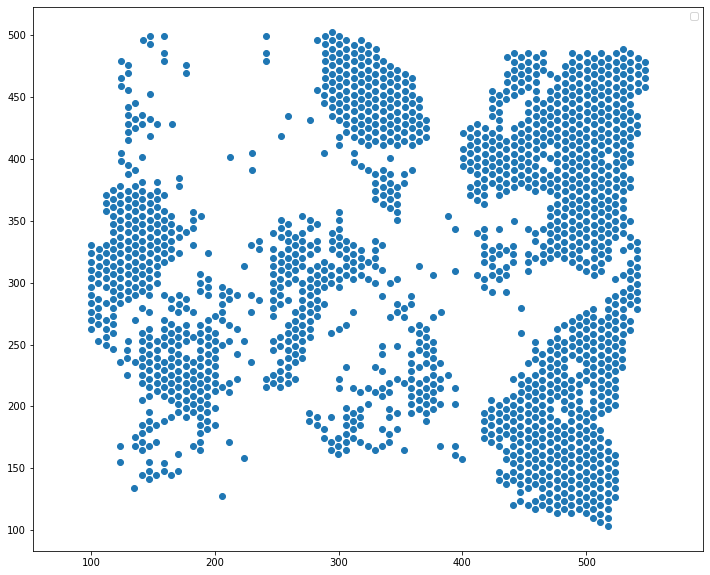

In [17]:
%pylab inline
figsize(12,10)
index = [i for i,e in enumerate(data.obs['lr_cluster']) if data.obs['lr_cluster'][i]==0]
plt.scatter(data.obs['imagerow'][index], data.obs['imagecol'][index]);
plt.legend();
plt.axis('equal');

In [18]:
data = st.tl.cci.base.lr_scan(data, 'normalised', lr4, 0, 10, 3)

C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn\lib\site-packages\anndata\core\alignedmapping.py:162: UserWarning: AnnData does not currently support writing or reading of 'DataFrame' objects in obsm for either hdf5 or zarr formats.
  self._validate_value(value, key)


The largest expressed LR cluster is:  0


No handles with labels found to put in legend.


Populating the interactive namespace from numpy and matplotlib


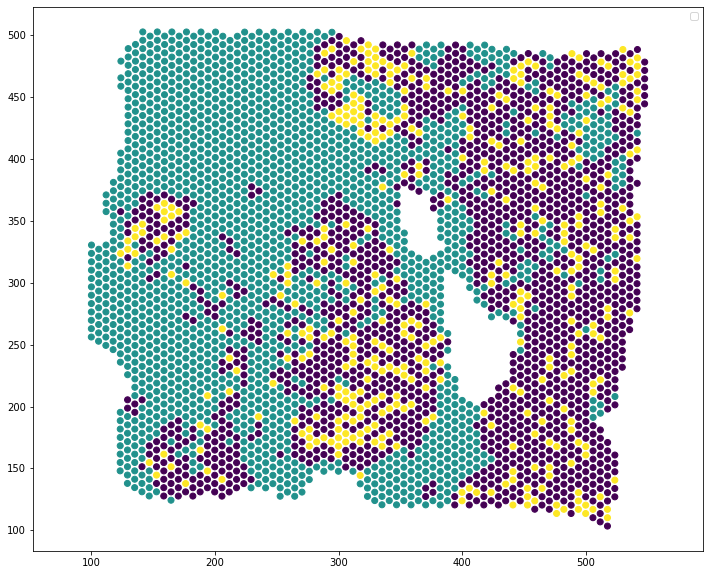

In [19]:
%pylab inline
figsize(12,10)
plt.scatter(data.obs['imagerow'], data.obs['imagecol'], c=data.obs['lr_neighbour_cluster']);
plt.legend();
plt.axis('equal');

No handles with labels found to put in legend.


Populating the interactive namespace from numpy and matplotlib


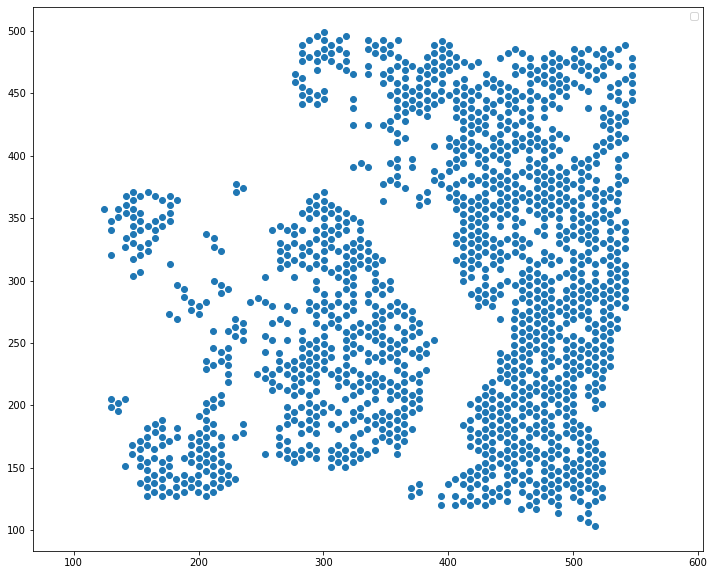

In [20]:
%pylab inline
figsize(12,10)
index = [i for i,e in enumerate(data.obs['lr_neighbour_cluster']) if data.obs['lr_neighbour_cluster'][i]==0]
plt.scatter(data.obs['imagerow'][index], data.obs['imagecol'][index]);
plt.legend();
plt.axis('equal');

### 3.3. stlearn.pp.log1p

In [12]:
st.pp.log1p(data)

In [13]:
data.X

<3353x18496 sparse matrix of type '<class 'numpy.float32'>'
	with 15226569 stored elements in Compressed Sparse Row format>

### 3.4. stlearn.pp.scale

In [14]:
st.pp.scale(data)

In [15]:
data.X

array([[-0.12421821, -0.03338031, -0.33429557, ..., -1.3757991 ,
        -0.38259155, -0.10311573],
       [-0.12421821, -0.03338031, -0.33429557, ...,  0.4287809 ,
        -0.38259155, -0.10311573],
       [-0.12421821, -0.03338031, -0.33429557, ...,  0.04642975,
        -0.38259155, -0.10311573],
       ...,
       [-0.12421821, -0.03338031, -0.33429557, ...,  0.86561936,
        -0.38259155, -0.10311573],
       [-0.12421821, -0.03338031, -0.33429557, ...,  0.14558646,
        -0.38259155, -0.10311573],
       [-0.12421821, -0.03338031, -0.33429557, ..., -0.06246075,
        -0.38259155, -0.10311573]], dtype=float32)

# 4. Dev: embedding

### 4.1. stlearn.em.pca

In [16]:
st.em.run_pca(data,n_comps=50)

PCA is done! Generated in adata.obsm["X_pca"], adata.uns["pca"] and adata.varm["PCs"]


In [17]:
data

AnnData object with n_obs × n_vars = 3353 × 18496 
    obs: 'imagerow', 'imagecol'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### 4.2. stlearn.em.umap

In [94]:
st.em.run_umap(data,n_components=2)

UMAP is done! Generated in adata.obsm["X_umap"]


In [95]:
data

AnnData object with n_obs × n_vars = 2698 × 18908 
    obs: 'imagerow', 'imagecol'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'umap_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [14]:
import pandas as pd

In [16]:
type(data)

anndata.core.anndata.AnnData

### 4.3. stlearn.em.run_ica

In [10]:
st.em.run_ica(data,n_factors=20)

AttributeError: 'str' object has no attribute 'obsm'

In [ ]:
data

### 4.4. stlearn.em.run_scvi

In [10]:
st.em.run_ldvae(data,n_factors=20)

ImportError: cannot import name 'LDVAE'

In [2]:
import scvi.models.

ModuleNotFoundError: No module named 'scvi.models.LDVAE'

In [3]:
import scvi

In [4]:
scvi.__version__

'0.2.2'

In [25]:
vae.LDVAE

AttributeError: module 'scvi.models.vae' has no attribute 'LDVAE'

In [ ]:
data.obsm["X_scvi"]

### 4.5. stlearn.em.run_mr

In [6]:
st.em.run_mr(data,n_factors=20)

R[write to console]: Loading required namespace: GPArotation



MRFA is done! Generated in adata.obsm["X_mr"]


In [29]:
data.obs

x      y
9.92x19.11  9.92  19.11
9.92x19.99  9.92  19.99
9.92x21.08  9.92  21.08
9.92x22.01  9.92  22.01
9.97x23.19  9.97  23.19
...          ...    ...
8.94x19.99  8.94  19.99
9.01x21.16  9.01  21.16
8.94x22.01  8.94  22.01
8.94x23.15  8.94  23.15
9.02x24.16  9.02  24.16

[62 rows x 2 columns]

# 5. Dev: tools

## A. Clustering

### 5.1 stlearn.tl.clustering.kmeans

In [53]:
from sklearn.preprocessing import normalize

In [18]:
st.tl.clustering.kmeans(data,n_clusters=12)

Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans_labels"]


In [418]:
label = pd.read_csv("../../../label.csv")

In [419]:
data.obs["tmp_label"] = label.x.values

In [420]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 180
fig, a = plt.subplots()
colors = data.obs["tmp_label"]
	# Plot scatter plot based on pixel of spots
sc = a.scatter(data.obs["imagecol"], data.obs["imagerow"], edgecolor="none", alpha=1,s=6.7,marker="o",
               cmap=plt.get_cmap("Set1"),c=colors)
a.imshow(data.uns["tissue_img"],alpha=1, zorder=-1,)

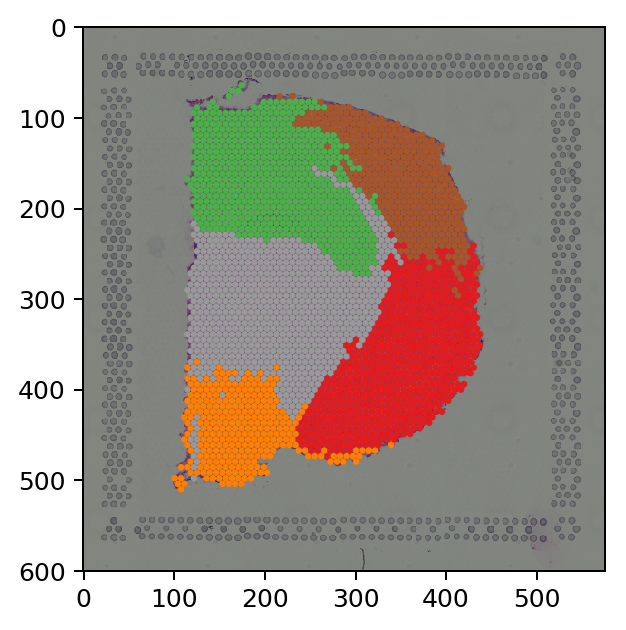

In [421]:
fig

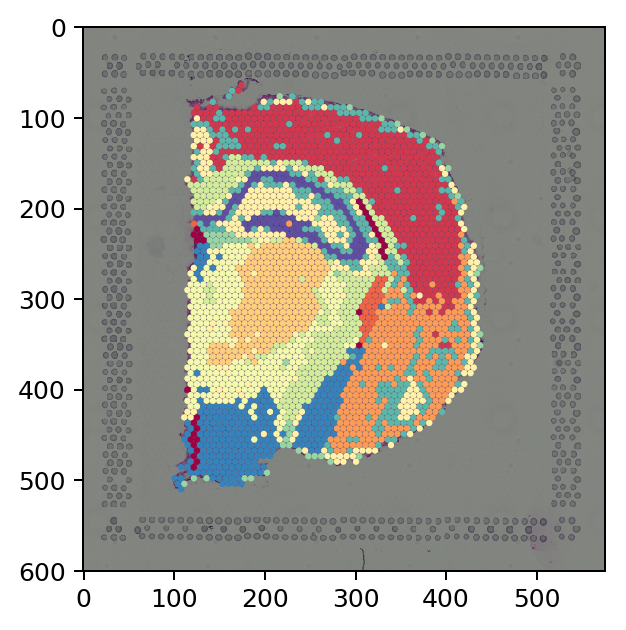

In [65]:
fig

# 6. Dev: plotting
### 6.1 stlearn.pl.tissue_plot

#### a. Plot single gene

In [8]:
st.pl.tissue_plot(data,plot="genes",genes="Rbfox3",dpi=180)

[4. 0. 2. ... 1. 2. 6.]
The plot stored in adata.uns['plot']


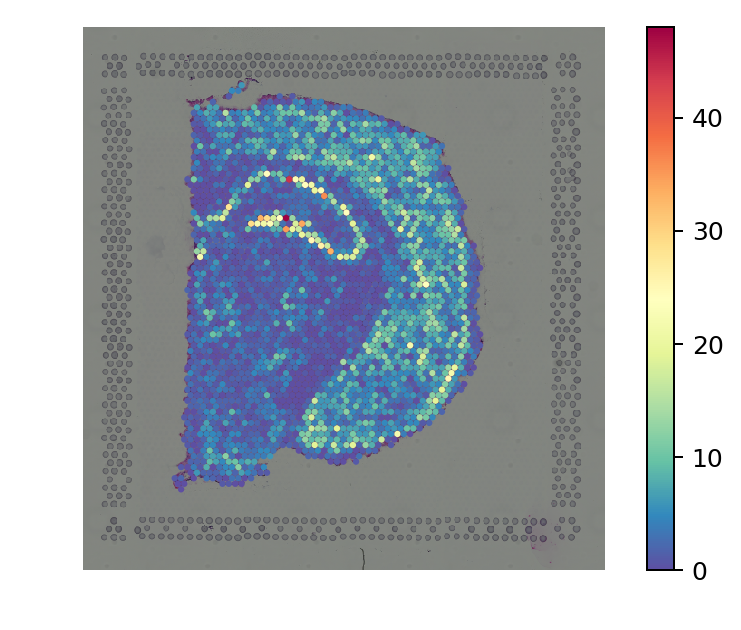

In [9]:
from matplotlib import pyplot as plt

plt.show(data.uns["plots"]["Rbfox3"])

#### b. Plot multiple genes

In [8]:
st.pl.tissue_plot(data,plot="genes",genes=["Rbfox3","Mbp","Gfap","abc"],method="CumSum",dpi=180)

/home/d.pham/UQ/ST/Working/stLearn/Development/v2/stLearn/stlearn/plotting/tissue_plot.py:124: UserWarning: We removed abc because they not exist in the data
  warnings.warn("We removed " + gene + " because they not exist in the data")


The plot stored in adata.uns['plot']


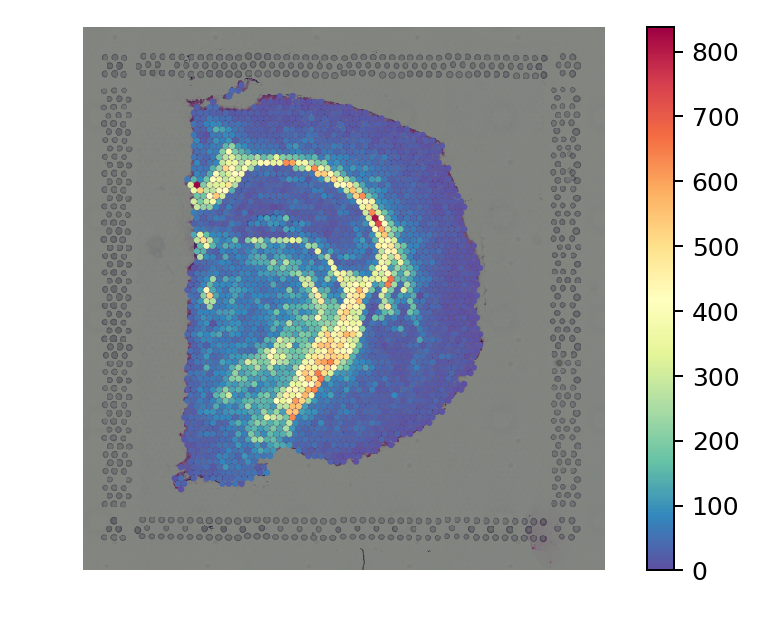

In [9]:
from matplotlib import pyplot as plt

plt.show(data.uns["plots"]["Rbfox3, Mbp, Gfap"])

#### c. Plot clusters

In [37]:
st.pl.tissue_plot(data,plot="cluster",method="kmeans",cmap="jet",dpi=180)

The plot stored in adata.uns['kmeans']


In [23]:
import matplotlib.pyplot as plt
plt.show(data.uns["plots"]["kmeans"])

KeyError: 'kmeans'

#### 4. Plot factors analysis

In [12]:
st.pl.tissue_plot(data,plot="factor_analysis",method="ica",dpi=180)

The plot stored in adata.uns['plot']['ica']


In [26]:
import matplotlib.pyplot as plt
plt.show(data.uns['plots']['ica']["factor_0"])2134

SyntaxError: invalid syntax (<ipython-input-26-7c28030700ce>, line 2)